In [1]:
import pandas 
dataTraining = pandas.read_csv("spam.csv", encoding = "latin-1")
dataTraining = dataTraining[['v1','v2']]
dataTraining = dataTraining.rename(columns = {'v1': 'Label', 'v2': 'Content'})
dataTraining['Label'].value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

In [2]:
import nltk 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import stem
stemmer = stem.SnowballStemmer('english')
stopWords = set(stopwords.words('english'))

import re 
def replace_words(text): 
    LatinChar = '[^\x00-\x7F\x80-\xFF\u0100-\u017F\u0180-\u024F\u1E00-\u1EFF]' 
    SpecialAndSpaceChar = '[/^$*+?#!@{}&\n\t\f\r]'
    #Xử lý lọc dữ liệu
    deleteLatin = re.sub(LatinChar, '', text).strip()
    text = re.sub(SpecialAndSpaceChar, '', deleteLatin).strip()
    return text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tuanc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tuanc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tuanc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [3]:
dataTraining['Content'] = dataTraining['Content'].apply(replace_words)
Tokens = [] 
for data in dataTraining['Content'].fillna(""):
    token = word_tokenize(data)
    Tokens.append(token)
    
index = 0
dataChanged = []
while index < len(Tokens):
    tmp = ""
    for work in Tokens[index]:
        if stemmer.stem(work) not in stopWords:
            tmp = tmp + stemmer.stem(work.lower()) + ' '
            
    dataChanged.append(tmp)                
    index+=1

In [4]:
dataFrame = pandas.DataFrame(dataTraining)
# Dữ liệu dùng để chia thành hai tập: tập huấn luyện và tập kiểm tra 
x = dataChanged
y = dataFrame['Label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.9)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [5]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score #Đánh gía mô hình bằng độ chính xác (accuracy)
count_vect = CountVectorizer()
tfidf_transformer = TfidfTransformer()

model = Pipeline([('vect', CountVectorizer()), 
                  ('LinearSVC', LinearSVC(class_weight='balanced'))])
model = model.fit(X_train, y_train)
predicted = model.predict(X_test)
accuracy_score(y_test, predicted)

0.992831541218638

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
def plot_learning_curves(estimator, title, xTest, yTest, cv, yLim = (.8, 1.01), train_sizes=np.linspace(.1, 1.0, 7)):
    plt.figure(figsize=(10,8))
    plt.title(title)
    # Chú thích tên của trục X, Y
    plt.xlabel("Training examples") 
    plt.ylabel("Score")
    # Thiêt lập giới hạn giá trị của trục Y
    plt.ylim(*yLim)
    
    #chia dữ liệu
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, xTest, yTest, cv = cv, train_sizes = train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    plt.legend(loc="best")
    
    return plt

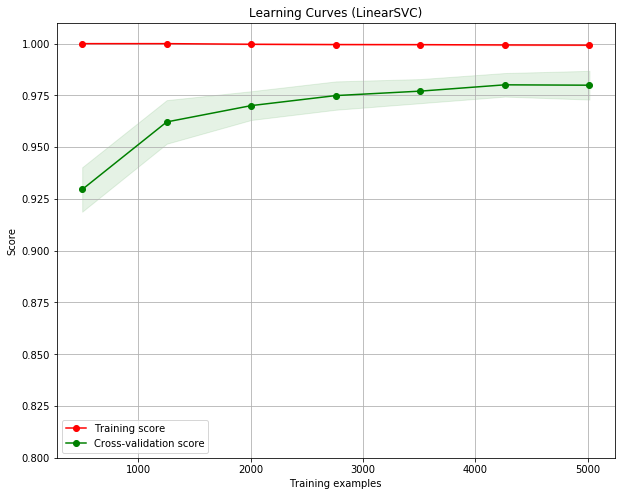

In [7]:
title = "Learning Curves (LinearSVC)"
estimator = LinearSVC()
xTest = tfidf_transformer.fit_transform(count_vect.fit_transform(x))
yTest = y
cv = ShuffleSplit(n_splits = 10, test_size = 0.1, random_state = 0)
plot_learning_curves(estimator, title, xTest, yTest, cv)
plt.show()

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score #Đánh gía mô hình bằng độ chính xác (accuracy)

count_vect = CountVectorizer()
model = Pipeline([('vect', CountVectorizer()), 
                  ('MultiNB', MultinomialNB())])
model = model.fit(X_train, y_train)
predicted = model.predict(X_test)
accuracy_score(y_test, predicted)

0.989247311827957

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer()
tfidf_transformer = TfidfTransformer()

model = Pipeline([('vect', CountVectorizer()),  
                  ('LogisticRegression', LogisticRegression())])
model = model.fit(X_train, y_train)
predicted = model.predict(X_test)
accuracy_score(y_test, predicted)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9910394265232975

In [10]:
y = []
for label in dataTraining['Label']:
    if (label == "ham"):
        y.append(1)
    else:
        y.append(0)
print(y[:10])
X = tfidf_transformer.fit_transform(count_vect.fit_transform(dataChanged))
X = np.concatenate((np.ones((1, X.shape[1])), X.toarray()), axis = 0)

[1, 1, 0, 1, 1, 0, 1, 1, 0, 0]


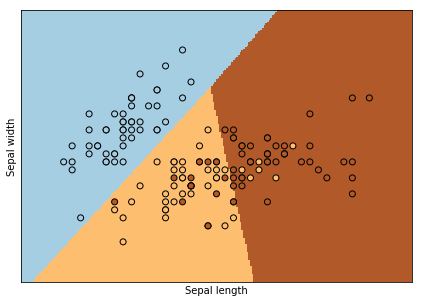

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(7, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()